Actividad integradora 2 - Parte 1: Redes de conectividad en el cerebro humano

Equipo 5
Erick Eduardo Orozco Reyes - A01198247
Herbert Eduardo Euroza Hernández - A01635175
Carlos Dhali Tejeda Tapia - A00344820

Librerias que se usarán a lo largo del proyecto

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue

import networkx as nx
import math
from math import atan2

import matplotlib as mpl
import matplotlib.cm as cm

from scipy.spatial import Voronoi, voronoi_plot_2d

Clases Generales (Se usaran en la mayoria del proyecto).

In [ ]:
def dist(xA, yA, zA, xB, yB, zB):
    punto1 = np.array([xA, yA, zA])
    punto2 = np.array([xB, yB, zB])
    dist = np.linalg.norm(punto2 - punto1)
    return dist

In [ ]:
class WeightedGraph:
    _directed = True
    _adjacency_list = {}  # Lista de adyacencia

    def __init__(self, directed: bool = False):
        self._directed = directed
        self._adjacency_list = {}

    def clear(self):
        self._adjacency_list = {}

    def number_of_vertices(self):
        return len(self._adjacency_list)

    def vertices(self):
        return list(self._adjacency_list.keys())

    def edges(self):
        edges = []
        for v in self._adjacency_list:
            for neighbor, weight in self._adjacency_list[v]:
                if self._directed or (neighbor, v, weight) not in edges:
                    edges.append((v, neighbor, weight))
        return edges

    def add_vertex(self, v):
        if v not in self._adjacency_list:
            self._adjacency_list[v] = []

    def remove_vertex(self, v):
        if v in self._adjacency_list:
            del self._adjacency_list[v]
            for vertex in self._adjacency_list:
                self._adjacency_list[vertex] = [(u, w) for u, w in self._adjacency_list[vertex] if u != v]

    def add_edge(self, v1, v2, e=0):
        if v1 in self._adjacency_list and v2 in self._adjacency_list:
            if (v2, e) not in self._adjacency_list[v1]:
                self._adjacency_list[v1].append((v2, e))
                if not self._directed:
                    self._adjacency_list[v2].append((v1, e))

    def remove_edge(self, v1, v2, e):
        if v1 in self._adjacency_list and v2 in self._adjacency_list:
            self._adjacency_list[v1] = [(u, w) for u, w in self._adjacency_list[v1] if u != v2 or w != e]
            if not self._directed:
                self._adjacency_list[v2] = [(u, w) for u, w in self._adjacency_list[v2] if u != v1 or w != e]

    def adjacent_vertices(self, v):
        return self._adjacency_list.get(v, [])

    def is_adjacent(self, v1, v2) -> bool:
        return any(u == v2 for u, _ in self._adjacency_list.get(v1, []))

    def graficasGraph(self, matrix_file, coordinates_file):
        matrix, coordinates = self.load_data(matrix_file, coordinates_file)
        self.build_graph(matrix, coordinates)
        self.print_graph()

    def load_data(self, matrix_file, coordinates_file):
        print(matrix_file)
        matrix = np.loadtxt(matrix_file, dtype=int)
        coordinates = np.loadtxt(coordinates_file, dtype=str)
        return matrix, coordinates

    def build_graph(self, matrix, coordinates):
        for i in range(len(coordinates)):
            self.add_vertex(coordinates[i][0])

        for i in range(len(coordinates)):
            for x in range(len(matrix[i])):
                if matrix[i][x] == 1 and not self.is_adjacent(coordinates[i][0], coordinates[x][0]):
                    cost = dist(float(coordinates[i][1]), float(coordinates[i][2]), float(coordinates[i][3]),
                                float(coordinates[x][1]), float(coordinates[x][2]), float(coordinates[x][3]))
                    self.add_edge(coordinates[i][0], coordinates[x][0], cost)

    def print_graph(self):
        for vertex in self._adjacency_list:
            for neighbor, weight in self._adjacency_list[vertex]:
                print(vertex, " -> ", neighbor, " weight: ", weight)


class TreeNode:
    def __init__(self, parent, v, c):
        self.parent = parent
        self.v = v
        self.c = c

    def path(self):
        node = self
        path = []
        while node is not None:
            path.insert(0, node.v)
            node = node.parent
        return path

    def __lt__(self, other):
        return self.c < other.c


class GraphFloyd:
    def __init__(self, directed: bool = False):
        self._directed = directed
        self._vertices = []
        self._adjacency_matrix = []

    def add_vertex(self, v):
        if v not in self._vertices:
            self._vertices.append(v)
            n = len(self._vertices)
            if n > 1:
                for vertex in self._adjacency_matrix:
                    vertex.append(0)
            self._adjacency_matrix.append(n * [0])

    def remove_vertex(self, v):
        if v in self._vertices:
            index = self._vertices.index(v)
            self._vertices.pop(index)
            for row in self._adjacency_matrix:
                row.pop(index)
            self._adjacency_matrix.pop(index)

    def add_edge(self, v1, v2, e=0):
        if v1 in self._vertices and v2 in self._vertices:
            index1 = self._vertices.index(v1)
            index2 = self._vertices.index(v2)
            self._adjacency_matrix[index1][index2] = e
            if not self._directed:
                self._adjacency_matrix[index2][index1] = e

    def remove_edge(self, v1, v2):
        if v1 in self._vertices and v2 in self._vertices:
            index1 = self._vertices.index(v1)
            index2 = self._vertices.index(v2)
            self._adjacency_matrix[index1][index2] = 0
            if not self._directed:
                self._adjacency_matrix[index2][index1] = 0

    def is_adjacent(self, v1, v2) -> bool:
        if v1 in self._vertices and v2 in self._vertices:
            i = self._vertices.index(v1)
            j = self._vertices.index(v2)
            return self._adjacency_matrix[i][j] != 0
        return False

    def graficasGraph(self, matrix_file, coordinates_file):
        matrix, coordinates = self.load_data(matrix_file, coordinates_file)
        self.build_graph(matrix, coordinates)
        self.print_graph()

    def load_data(self, matrix_file, coordinates_file):
        print(matrix_file)
        matrix = np.loadtxt(matrix_file, dtype=int)
        coordinates = np.loadtxt(coordinates_file, dtype=str)
        return matrix, coordinates

    def build_graph(self, matrix, coordinates):
        for i in range(len(coordinates)):
            self.add_vertex(coordinates[i][0])

        for i in range(len(coordinates)):
            for x in range(len(matrix[i])):
                if matrix[i][x] == 1 and not self.is_adjacent(coordinates[i][0], coordinates[x][0]):
                    cost = dist(float(coordinates[i][1]), float(coordinates[i][2]), float(coordinates[i][3]),
                                float(coordinates[x][1]), float(coordinates[x][2]), float(coordinates[x][3]))
                    self.add_edge(coordinates[i][0], coordinates[x][0], cost)

    def print_graph(self):
        n = len(self._vertices)
        for i in range(n):
            for j in range(n):
                if self._adjacency_matrix[i][j] != 0:
                    print(self._vertices[i], " -> ", self._vertices[j], " edge weight: ", self._adjacency_matrix[i][j])


Funciones de gráficación

In [ ]:
def convertir_3d_a_2d(points3D):
    r = np.sqrt(points3D[:, 0]**2 + points3D[:, 1]**2 + points3D[:, 2]**2)
    t = r / (r + points3D[:, 2])
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    return np.column_stack((x, y))

def graficar_puntos_2d(points2D, channels):
    circle = plt.Circle((0, 0), 1, color='r', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

def graficar_aristas_2d(points2D, channels, graph):
    for vertex in channels:
        neighbors = graph.adjacent_vertices(vertex)
        if len(neighbors) == 0:
            continue
        for neighbor, weight in neighbors:
            v_index = channels.index(vertex)
            n_index = channels.index(neighbor)
            plt.plot([points2D[v_index, 0], points2D[n_index, 0]],
                     [points2D[v_index, 1], points2D[n_index, 1]],
                     color='red', linestyle='--', linewidth=2)

def generar_puntos_3d(conjunto_electrodos="8"):
    """
    Genera puntos 3D para electrodos.

    :param conjunto_electrodos: Una cadena que especifica el conjunto de electrodos ("8" o "32").
    :return: Un array de NumPy que contiene los puntos 3D.
    """
    if conjunto_electrodos == "8":
        return np.array([[0, 0.71934, 0.694658],
                         [-0.71934, 0, 0.694658],
                         [0, 0, 1],
                         [0.71934, 0, 0.694658],
                         [0, -0.71934, 0.694658],
                         [-0.587427, -0.808524, -0.0348995],
                         [0, -0.999391, -0.0348995],
                         [0.587427, -0.808524, -0.0348995]])
    elif conjunto_electrodos == "32":
        return np.array([[-0.308829, 0.950477, -0.0348995],
                     [0.308829, 0.950477, -0.0348995],
                     [-0.406247, 0.871199, 0.275637],
                     [0.406247, 0.871199, 0.275637],
                     [-0.808524, 0.587427, -0.0348995],
                     [-0.545007, 0.673028, 0.5],
                     [0, 0.71934, 0.694658],
                     [0.545007, 0.673028, 0.5],
                     [0.808524, 0.587427, -0.0348995],
                     [-0.887888, 0.340828, 0.309017],
                     [-0.37471, 0.37471, 0.848048],
                     [0.37471, 0.37471, 0.848048],
                     [0.887888, 0.340828, 0.309017],
                     [-0.999391, 0, -0.0348995],
                     [-0.71934, 0, 0.694658],
                     [0, 0, 1],
                     [0.71934, 0, 0.694658],
                     [0.999391, 0, -0.0348995],
                     [-0.887888, -0.340828, 0.309017],
                     [-0.37471, -0.37471, 0.848048],
                     [0.37471, -0.37471, 0.848048],
                     [0.887888, -0.340828, 0.309017],
                     [-0.808524, -0.587427, -0.0348995],
                     [-0.545007, -0.673028, 0.5],
                     [0, -0.71934, 0.694658],
                     [0.545007, -0.673028, 0.5],
                     [0.808524, -0.587427, -0.0348995],
                     [-0.406247, -0.871199, 0.275637],
                     [0.406247, -0.871199, 0.275637],
                     [-0.308829, -0.950477, -0.0348995],
                     [0, -0.999391, -0.0348995],
                     [0.308829, -0.950477, -0.0348995]])

def graficarGrafos(conjunto_electrodos="8", grafica=WeightedGraph):
    """
    Grafica la representación 2D de los puntos de electrodos y las aristas en el grafo.

    :param conjunto_electrodos: Una cadena que especifica el conjunto de electrodos ("8" o "32").
    :param grafica: Una instancia de la clase WeightedGraph.
    """
    if conjunto_electrodos not in ["8", "32"]:
        print("Error: El conjunto de electrodos debe ser '8' o '32'")
        return

    canales_8 = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']
    canales_32 = ['Fp1', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz',
                  'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO3', 'PO4', 'O1', 'Oz', 'O2']

    # Genera puntos 3D y los convierte a 2D
    puntos_3D = generar_puntos_3d(conjunto_electrodos)
    puntos_2D = convertir_3d_a_2d(puntos_3D)

    # Grafica los puntos 2D y las aristas
    graficar_puntos_2d(puntos_2D, canales_8 if conjunto_electrodos == "8" else canales_32)
    graficar_aristas_2d(puntos_2D, canales_8 if conjunto_electrodos == "8" else canales_32, grafica)

    plt.axis('equal')
    plt.show()

Etapa 1

Grafica todos los grafos de conectividad que obtuviste en 2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def graph8(caminos):
    channels = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

    points3D = [[0, 0.71934, 0.694658], [-0.71934, 0, 0.694658], [0, 0, 1], [0.71934, 0, 0.694658],
                [0, -0.71934, 0.694658], [-0.587427, -0.808524, -0.0348995], [0, -0.999391, -0.0348995],
                [0.587427, -0.808524, -0.0348995]]
    points3D = np.array(points3D)

    r = np.sqrt(points3D[:, 0] ** 2 + points3D[:, 1] ** 2 + points3D[:, 2] ** 2)
    t = r / (r + points3D[:, 2])
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    points2D = np.column_stack((x, y))

    circle = plt.Circle((0, 0), 1, color='r', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

    index = []

    for x in caminos:
        index.append(channels.index(x))

    print("index : ", index)

    for i in range(len(index) - 1):
        plt.plot([points2D[index[i], 0], points2D[index[i + 1], 0]],
                 [points2D[index[i], 1], points2D[index[i + 1], 1]],
                 color='red', linestyle='--', linewidth=2)

    plt.axis('equal')
    plt.show()

def graph32(caminos):
    channels = ['Fp1', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz',
                'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO3', 'PO4', 'O1', 'Oz', 'O2']

    points3D = [[-0.308829, 0.950477, -0.0348995], [0.308829, 0.950477, -0.0348995], [-0.406247, 0.871199, 0.275637],
                [0.406247, 0.871199, 0.275637], [-0.808524, 0.587427, -0.0348995], [-0.545007, 0.673028, 0.5],
                [0, 0.71934, 0.694658], [0.545007, 0.673028, 0.5], [0.808524, 0.587427, -0.0348995],
                [-0.887888, 0.340828, 0.309017], [-0.37471, 0.37471, 0.848048], [0.37471, 0.37471, 0.848048],
                [0.887888, 0.340828, 0.309017], [-0.999391, 0, -0.0348995], [-0.71934, 0, 0.694658], [0, 0, 1],
                [0.71934, 0, 0.694658], [0.999391, 0, -0.0348995], [-0.887888, -0.340828, 0.309017],
                [-0.37471, -0.37471, 0.848048], [0.37471, -0.37471, 0.848048], [0.887888, -0.340828, 0.309017],
                [-0.808524, -0.587427, -0.0348995], [-0.545007, -0.673028, 0.5], [0, -0.71934, 0.694658],
                [0.545007, -0.673028, 0.5], [0.808524, -0.587427, -0.0348995], [-0.406247, -0.871199, 0.275637],
                [0.406247, -0.871199, 0.275637], [-0.308829, -0.950477, -0.0348995], [0, -0.999391, -0.0348995],
                [0.308829, -0.950477, -0.0348995]]
    points3D = np.array(points3D)

    r = np.sqrt(points3D[:, 0] ** 2 + points3D[:, 1] ** 2 + points3D[:, 2] ** 2)
    t = r / (r + points3D[:, 2])
    x = r * points3D[:, 0]
    y = r * points3D[:, 1]
    points2D = np.column_stack((x, y))

    circle = plt.Circle((0, 0), 1, color='b', alpha=0.25, fill=False)
    plt.scatter(points2D[:, 0], points2D[:, 1])
    plt.gca().add_patch(circle)

    for i in range(len(points2D)):
        plt.text(points2D[i, 0] - 0.02, points2D[i, 1] + 0.025, channels[i])

    index = []
    for x in caminos:
        index.append(channels.index(x))

    # Resaltar la arista entre Fz y PO8
    for i in range(len(index) - 1):
        plt.plot([points2D[index[i], 0], points2D[index[i + 1], 0]],
                 [points2D[index[i], 1], points2D[index[i + 1], 1]],
                 color='red', linestyle='--', linewidth=2)

    plt.axis('equal')
    plt.show()

Llamada a funciones de Etapa 1

index :  []


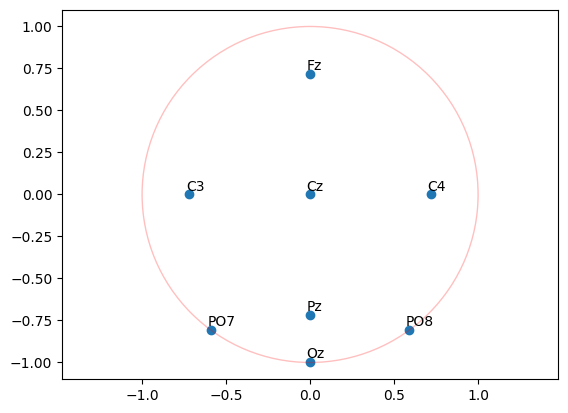

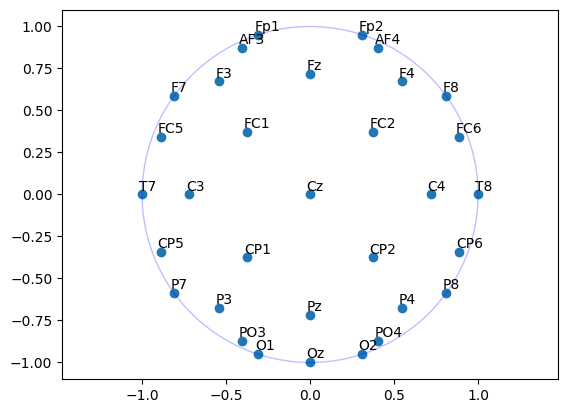

In [ ]:
arreglograficas = []

graph8(arreglograficas)

graph32(arreglograficas)

Etapa 2 - Análisis de caminos en los grafos de conectividad

Convierte todos tus grafos no ponderados a grafos ponderados utilizando como pesos las distancias físicas que hay entre electrodos (ver tablas de posiciones 3D).

In [ ]:
grafo1 = WeightedGraph(directed=False)
grafo2 = WeightedGraph(directed=False)
grafo3 = WeightedGraph(directed=False)
grafo4 = WeightedGraph(directed=False)

grafo1.graficasGraph('Operaciones_Dhali.txt', '8elec.txt')
grafo2.graficasGraph('Lectura_S0A.txt', '32elec.txt')

grafo1.print_graph
grafo2.print_graph

Operaciones_Dhali.txt
Fz  ->  Cz  weight:  0.7814625855176945
C3  ->  Cz  weight:  0.7814625855176945
C3  ->  Pz  weight:  1.0173003839574621
C3  ->  PO7  weight:  1.0969805121109717
Cz  ->  Fz  weight:  0.7814625855176945
Cz  ->  C3  weight:  0.7814625855176945
Cz  ->  C4  weight:  0.7814625855176945
Cz  ->  Pz  weight:  0.7814625855176945
C4  ->  Cz  weight:  0.7814625855176945
C4  ->  Pz  weight:  1.0173003839574621
Pz  ->  C3  weight:  1.0173003839574621
Pz  ->  Cz  weight:  0.7814625855176945
Pz  ->  C4  weight:  1.0173003839574621
Pz  ->  PO7  weight:  0.9408923487792055
Pz  ->  Oz  weight:  0.7814619046423504
Pz  ->  PO8  weight:  0.9408923487792055
PO7  ->  C3  weight:  1.0969805121109717
PO7  ->  Pz  weight:  0.9408923487792055
PO7  ->  Oz  weight:  0.617657422863192
PO7  ->  PO8  weight:  1.174854
Oz  ->  Pz  weight:  0.7814619046423504
Oz  ->  PO7  weight:  0.617657422863192
Oz  ->  PO8  weight:  0.617657422863192
PO8  ->  Pz  weight:  0.9408923487792055
PO8  ->  PO7  weight

<bound method WeightedGraph.print_graph of <__main__.WeightedGraph object at 0x7fd4dc5ed330>>


Para los grafos obtenidos con el dispositivo Unicorn, utiliza el método de BFS para encontrar caminos entre los siguientes pares de electrodos:

Fz - PO8
C3 - Oz
P07 - C4
Otras 2 parejas inventadas por el equipo.
Fz - C3
PO8 - Oz

Funciones necesarias para este paso:

In [ ]:
def bfs(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA;--- vertex ", v0, " no existe")

    if vg not in graph.vertices():
        print("ALERTA -  vertice ", vg, " no existe")


    frontier = Queue()
    frontier.put(TreeNode(None, v0, 0))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        # Expandir nodo
        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))

        explored_set[node.v] = 0


def dfs(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA vertice", v0, " no existe")

    if vg not in graph.vertices():
        print("ALERTA vertice ", vg, " no existe")

    frontier = LifoQueue()
    frontier.put(TreeNode(None, v0, 0))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                frontier.put(TreeNode(node, vertex[0], vertex[1] + node.c))

        explored_set[node.v] = 0


def uniform_cost(graph: WeightedGraph, v0, vg):
    if v0 not in graph.vertices():
        print("ALERTA vertice", v0, " no existe")

    if vg not in graph.vertices():
        print("ALETA vertice ", vg, " no existe")

    frontier = PriorityQueue()
    frontier.put((0, TreeNode(None, v0, 0)))

    explored_set = {}

    while True:
        if frontier.empty():
            return None

        node = frontier.get()[1]

        if node.v == vg:
            return {"Path": node.path(), "Cost": node.c}

        if node.v not in explored_set:
            adjacent_vertices = graph.adjacent_vertices(node.v)
            for vertex in adjacent_vertices:
                cost = vertex[1] + node.c
                frontier.put((cost, TreeNode(node, vertex[0], vertex[1] + node.c)))

        explored_set[node.v] = 0

def dist(xA, yA, zA, xB, yB, zB):
    punto1 = np.array([xA, yA, zA])
    punto2 = np.array([xB, yB, zB])
    dist = np.linalg.norm(punto2 - punto1)
    return dist


def ejecutar_algoritmo(algoritmo, grafica, inicio, destino, graficar):
    print(f"-----{algoritmo.__name__}-----")
    for x in range(len(inicio)):
        print(f"Viaje de {inicio[x]} -> {destino[x]}")
        res = algoritmo(grafica, inicio[x], destino[x])
        if res is not None:
            if graficar == 0:
                graph8(res["Path"])
            else:
                graph32(res["Path"])
        print(res)

def caminosBusquedas(arregloO_D, graficar, grafica=WeightedGraph):
    print("-----Recorridos de grafos-----")

    for algorithm in [bfs, dfs, uniform_cost]:
        ejecutar_algoritmo(algorithm, grafica, [x[0] for x in arregloO_D], [x[1] for x in arregloO_D], graficar)

-----Recorridos de grafos-----
-----bfs-----
Viaje de Fz -> PO8
index :  [0, 2, 4, 7]


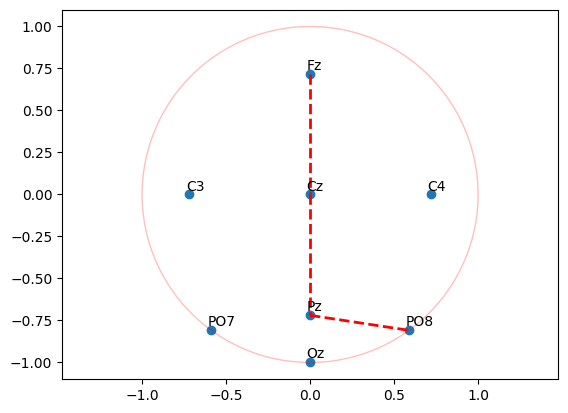

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz
index :  [1, 4, 6]


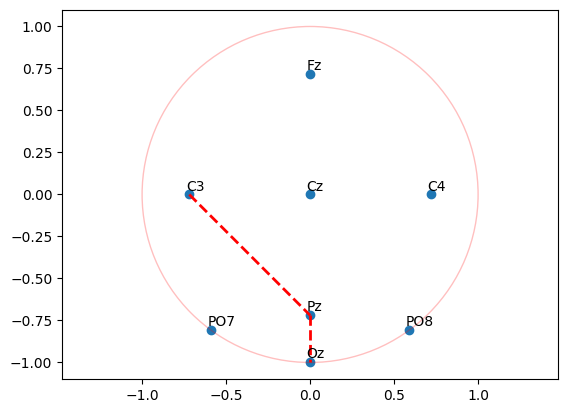

{'Path': ['C3', 'Pz', 'Oz'], 'Cost': 1.7987622885998125}
Viaje de PO7 -> C4
index :  [5, 4, 3]


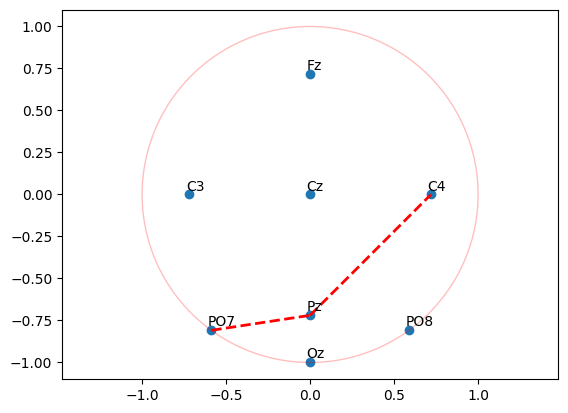

{'Path': ['PO7', 'Pz', 'C4'], 'Cost': 1.9581927327366677}
Viaje de Fz -> C3
index :  [0, 2, 1]


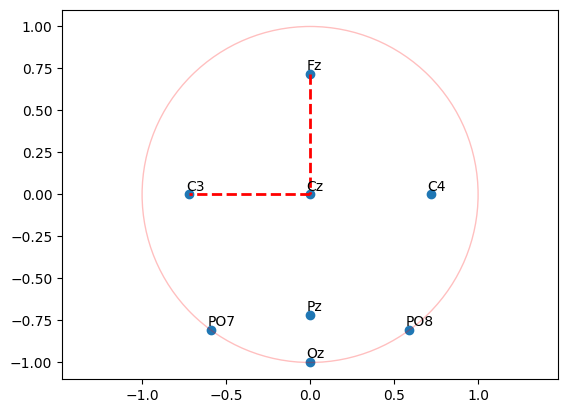

{'Path': ['Fz', 'Cz', 'C3'], 'Cost': 1.562925171035389}
Viaje de PO8 -> Oz
index :  [7, 6]


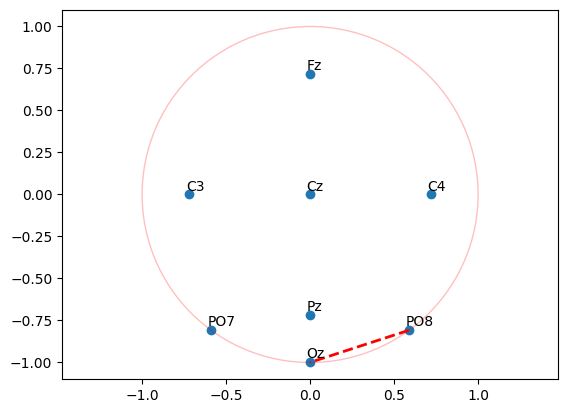

{'Path': ['PO8', 'Oz'], 'Cost': 0.617657422863192}
-----dfs-----
Viaje de Fz -> PO8
index :  [0, 2, 4, 7]


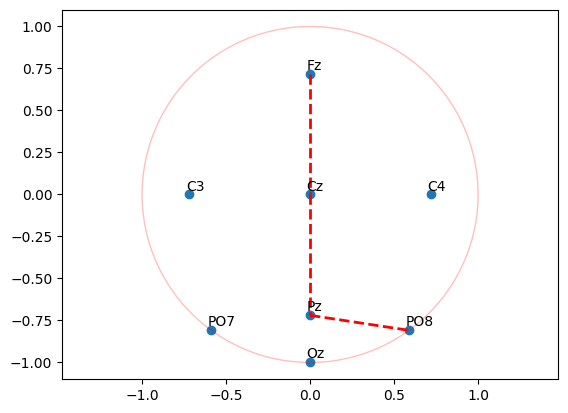

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz
index :  [1, 5, 7, 6]


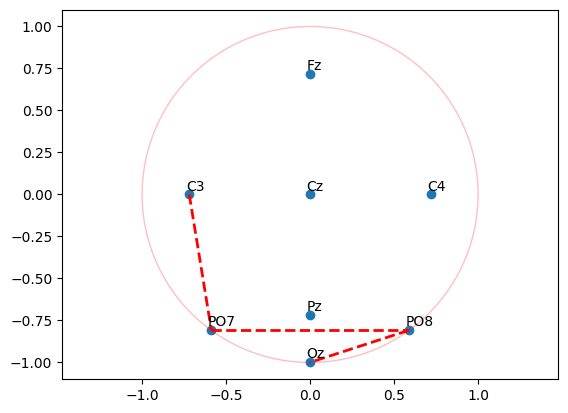

{'Path': ['C3', 'PO7', 'PO8', 'Oz'], 'Cost': 2.8894919349741635}
Viaje de PO7 -> C4
index :  [5, 7, 6, 4, 3]


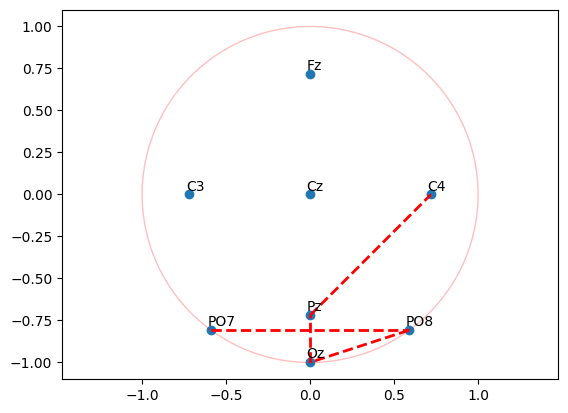

{'Path': ['PO7', 'PO8', 'Oz', 'Pz', 'C4'], 'Cost': 3.591273711463005}
Viaje de Fz -> C3
index :  [0, 2, 4, 7, 6, 5, 1]


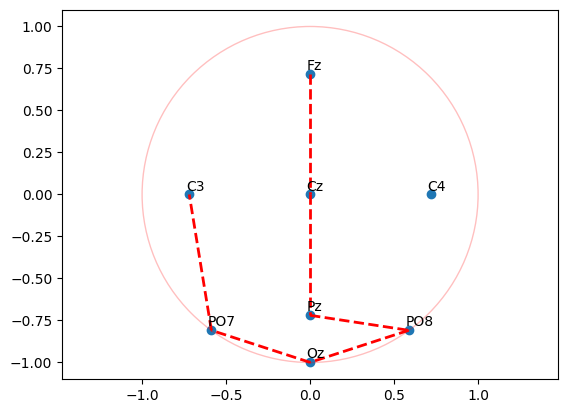

{'Path': ['Fz', 'Cz', 'Pz', 'PO8', 'Oz', 'PO7', 'C3'], 'Cost': 4.83611287765195}
Viaje de PO8 -> Oz
index :  [7, 6]


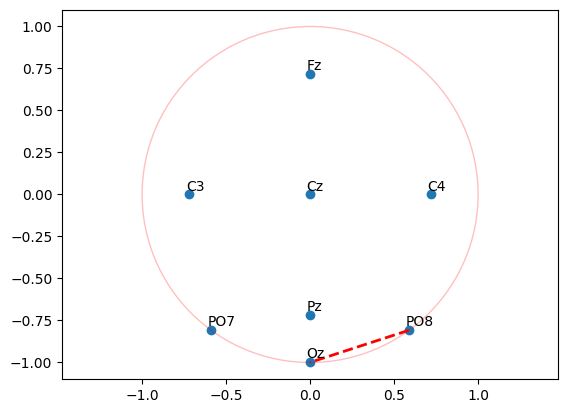

{'Path': ['PO8', 'Oz'], 'Cost': 0.617657422863192}
-----uniform_cost-----
Viaje de Fz -> PO8
index :  [0, 2, 4, 7]


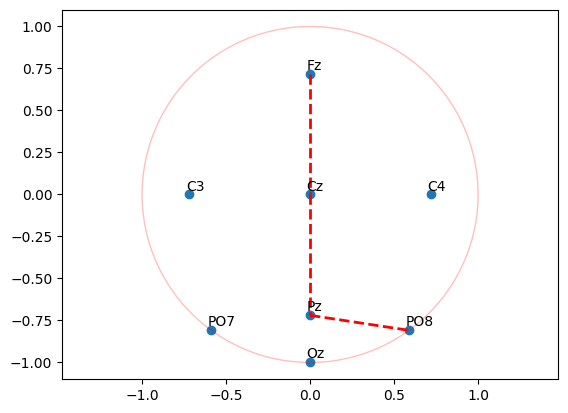

{'Path': ['Fz', 'Cz', 'Pz', 'PO8'], 'Cost': 2.5038175198145947}
Viaje de C3 -> Oz
index :  [1, 5, 6]


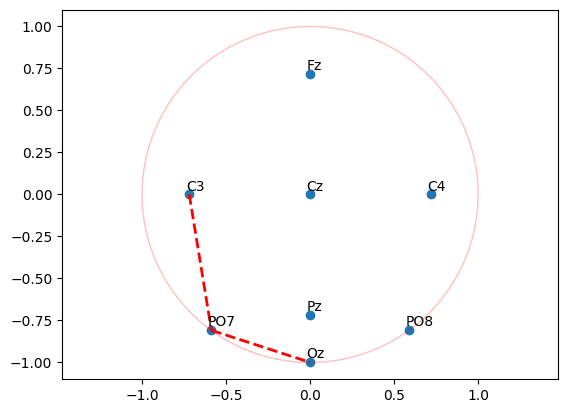

{'Path': ['C3', 'PO7', 'Oz'], 'Cost': 1.7146379349741636}
Viaje de PO7 -> C4
index :  [5, 4, 3]


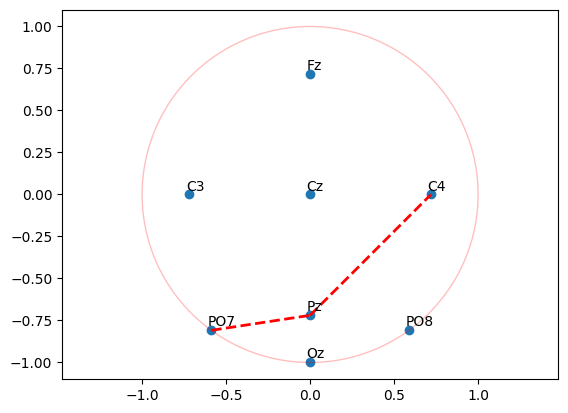

{'Path': ['PO7', 'Pz', 'C4'], 'Cost': 1.9581927327366677}
Viaje de Fz -> C3
index :  [0, 2, 1]


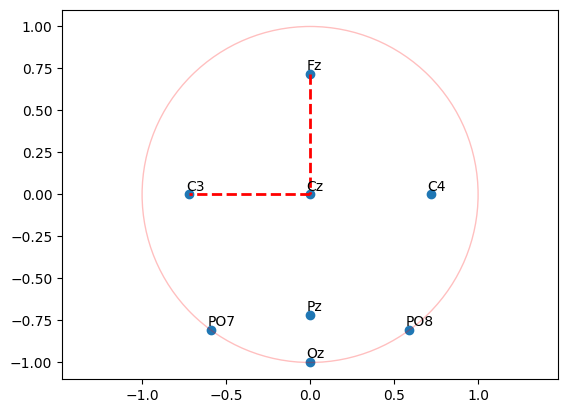

{'Path': ['Fz', 'Cz', 'C3'], 'Cost': 1.562925171035389}
Viaje de PO8 -> Oz
index :  [7, 6]


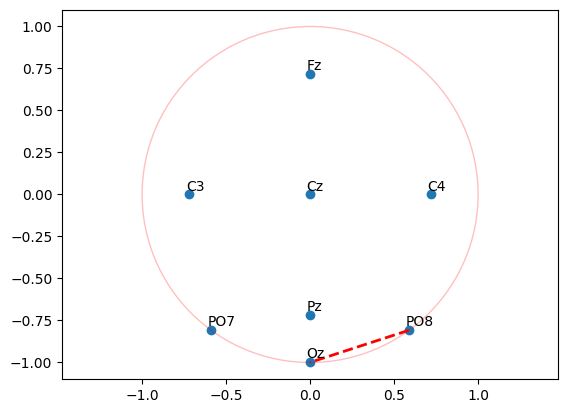

{'Path': ['PO8', 'Oz'], 'Cost': 0.617657422863192}
-----Recorridos de grafos-----
-----bfs-----
Viaje de F7 -> PO4


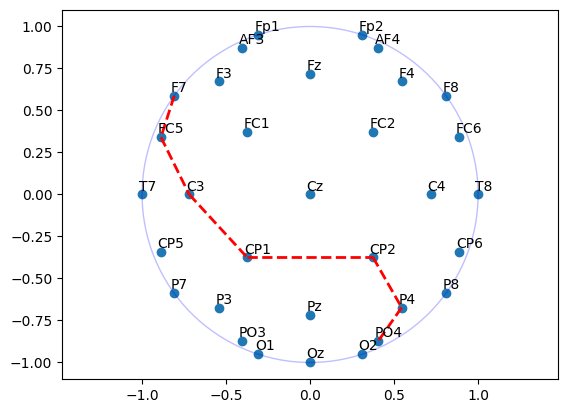

{'Path': ['F7', 'FC5', 'C3', 'CP1', 'CP2', 'P4', 'PO4'], 'Cost': 3.0722100239130095}
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


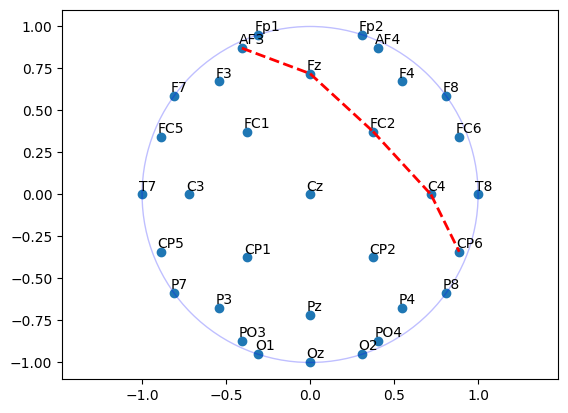

{'Path': ['AF3', 'Fz', 'FC2', 'C4', 'CP6'], 'Cost': 2.208021393484011}
Viaje de F8 -> CP2
None
Viaje de CP1 -> FC2


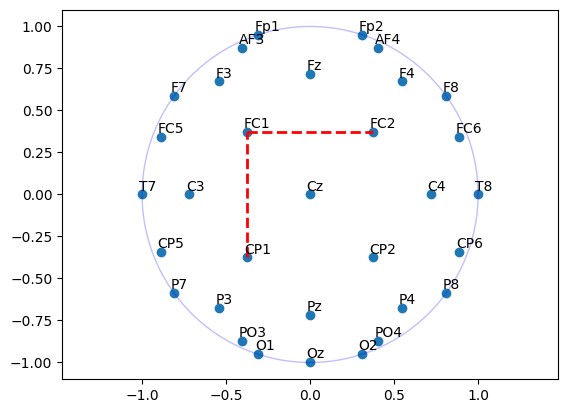

{'Path': ['CP1', 'FC1', 'FC2'], 'Cost': 1.49884}
Viaje de F3 -> O1


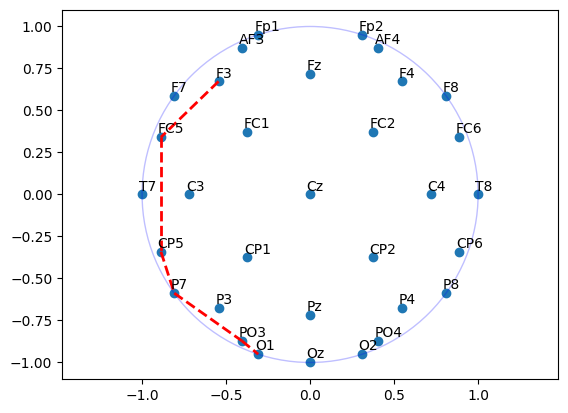

{'Path': ['F3', 'FC5', 'CP5', 'P7', 'PO3', 'O1'], 'Cost': 2.5434489293930467}
-----dfs-----
Viaje de F7 -> PO4


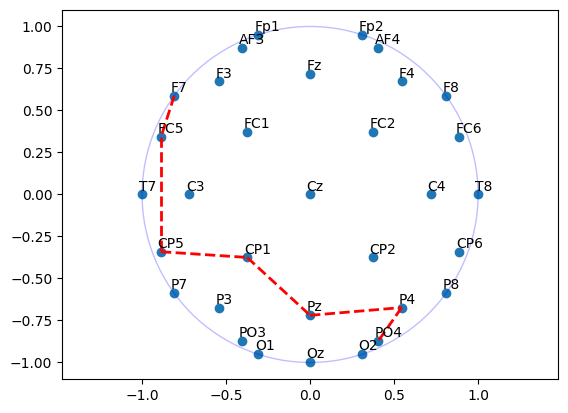

{'Path': ['F7', 'FC5', 'CP5', 'CP1', 'Pz', 'P4', 'PO4'], 'Cost': 3.2994671562982876}
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


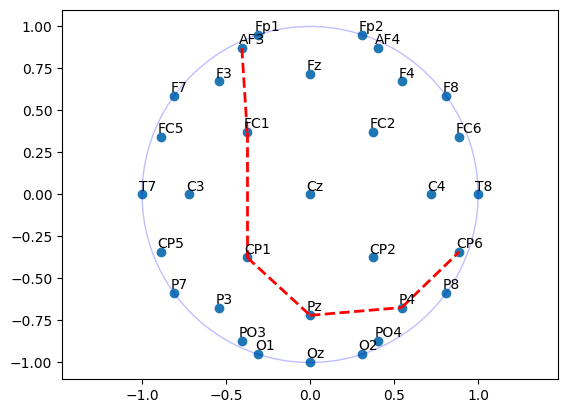

{'Path': ['AF3', 'FC1', 'CP1', 'Pz', 'P4', 'CP6'], 'Cost': 3.1342813297169543}
Viaje de F8 -> CP2
None
Viaje de CP1 -> FC2


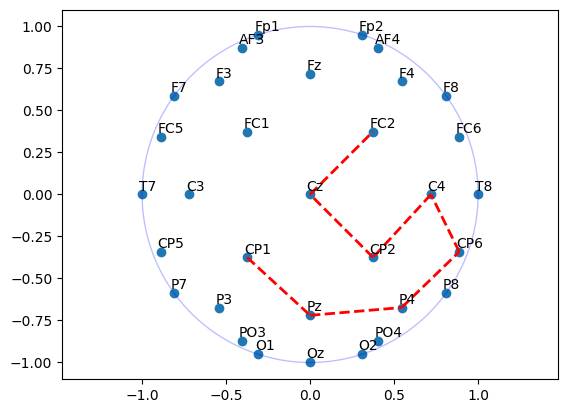

{'Path': ['CP1', 'Pz', 'P4', 'CP6', 'C4', 'CP2', 'Cz', 'FC2'], 'Cost': 3.8022900970741427}
Viaje de F3 -> O1


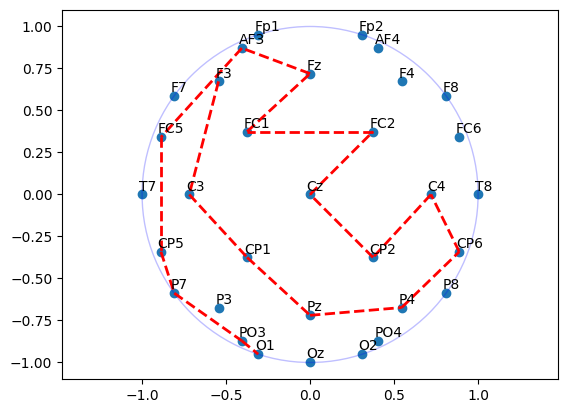

{'Path': ['F3', 'C3', 'CP1', 'Pz', 'P4', 'CP6', 'C4', 'CP2', 'Cz', 'FC2', 'FC1', 'Fz', 'AF3', 'FC5', 'CP5', 'P7', 'PO3', 'O1'], 'Cost': 9.686603252930079}
-----uniform_cost-----
Viaje de F7 -> PO4


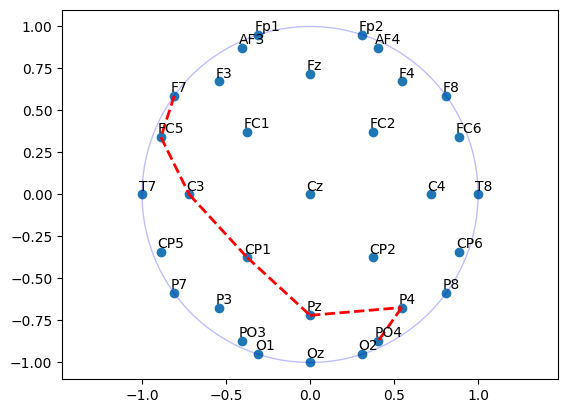

{'Path': ['F7', 'FC5', 'C3', 'CP1', 'Pz', 'P4', 'PO4'], 'Cost': 2.946056211325203}
Viaje de CP5 -> O2
None
Viaje de P4 -> T7
None
Viaje de AF3 -> CP6


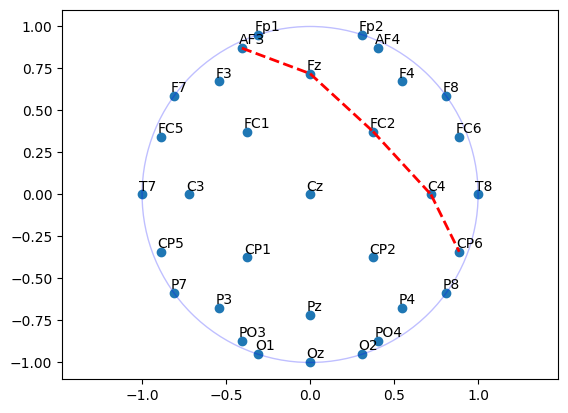

{'Path': ['AF3', 'Fz', 'FC2', 'C4', 'CP6'], 'Cost': 2.208021393484011}
Viaje de F8 -> CP2
None
Viaje de CP1 -> FC2


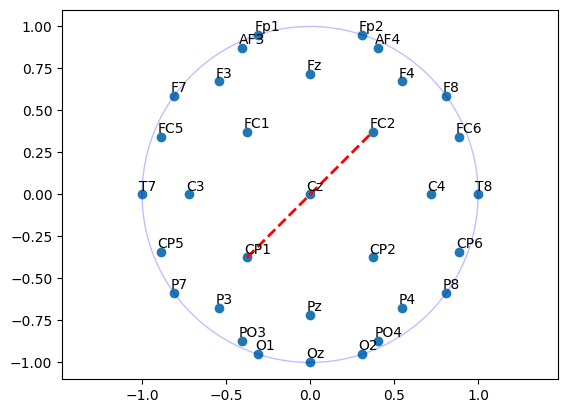

{'Path': ['CP1', 'Cz', 'FC2'], 'Cost': 1.1025508215116433}
Viaje de F3 -> O1


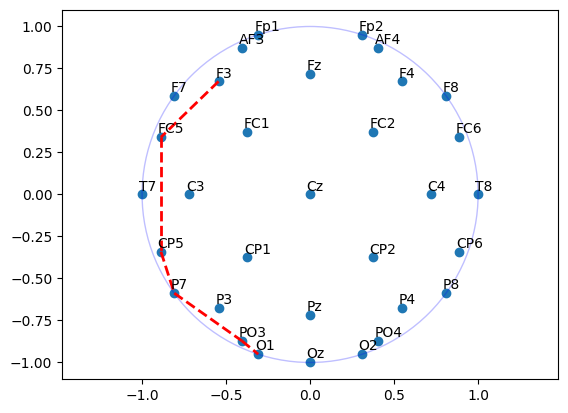

{'Path': ['F3', 'FC5', 'CP5', 'P7', 'PO3', 'O1'], 'Cost': 2.5434489293930467}


In [ ]:
#Arreglos para llamar a las funciones
#Arreglo para la busqueda de la matriz de 8 electrodos
array8= [('Fz', 'PO8'), ('C3', 'Oz'), ('PO7', 'C4'), ('Fz', 'C3'), ('PO8', 'Oz')]
#Arreglo para la busqueda de la matriz de 32 electrodos
array32 = [('F7', 'PO4'), ('CP5', 'O2'), ('P4', 'T7'), ('AF3', 'CP6'), ('F8', 'CP2'), ('CP1', 'FC2'), ('F3', 'O1')]
caminosBusquedas(array8, 0, grafo1)
caminosBusquedas(array32, 1, grafo2)

Utilice el método de Floyd para encontrar las distancias mínimas que hay entre todas las parejas de electrodos para todos los grafos.

Clase para hacer el calculo de Floyd-Warshall

In [ ]:
class FloydWarshall:
    @staticmethod
    def shortest_paths(adjacency_matrix):
        BIG_NUMBER = 100000000
        n = len(adjacency_matrix)

        matrix = np.array(adjacency_matrix)
        matrix[matrix == 0] = BIG_NUMBER

        for k in range(n):
            for i in range(n):
                for j in range(n):
                    if matrix[i][k] != BIG_NUMBER and matrix[k][j] != BIG_NUMBER and (matrix[i][k] + matrix[k][j]) < matrix[i][j]:
                        matrix[i][j] = matrix[i][k] + matrix[k][j]

        return matrix

In [ ]:
grafoFloyd = GraphFloyd(directed=False)
grafoFloyd2 = GraphFloyd(directed=False)

# Matriz de conexion, 0 y 1
grafoFloyd.graficasGraph('Operaciones_Dhali.txt', '8elec.txt')

grafoFloyd2.graficasGraph('Lectura_S0A.txt', '32elec.txt')

grafoFloydcalc = FloydWarshall()

#Impresión de la matriz de 8 electrodos
print("Length of shortest paths Matriz Floyd")
print(grafoFloydcalc.shortest_paths(grafoFloyd._adjacency_matrix))

#Impresión de la matriz de 32 electrodos
print("Length of shortest paths Matriz Floyd")
print(grafoFloydcalc.shortest_paths(grafoFloyd2._adjacency_matrix))

Operaciones_Dhali.txt
Fz  ->  Cz  edge weight:  0.7814625855176945
C3  ->  Cz  edge weight:  0.7814625855176945
C3  ->  Pz  edge weight:  1.0173003839574621
C3  ->  PO7  edge weight:  1.0969805121109717
Cz  ->  Fz  edge weight:  0.7814625855176945
Cz  ->  C3  edge weight:  0.7814625855176945
Cz  ->  C4  edge weight:  0.7814625855176945
Cz  ->  Pz  edge weight:  0.7814625855176945
C4  ->  Cz  edge weight:  0.7814625855176945
C4  ->  Pz  edge weight:  1.0173003839574621
Pz  ->  C3  edge weight:  1.0173003839574621
Pz  ->  Cz  edge weight:  0.7814625855176945
Pz  ->  C4  edge weight:  1.0173003839574621
Pz  ->  PO7  edge weight:  0.9408923487792055
Pz  ->  Oz  edge weight:  0.7814619046423504
Pz  ->  PO8  edge weight:  0.9408923487792055
PO7  ->  C3  edge weight:  1.0969805121109717
PO7  ->  Pz  edge weight:  0.9408923487792055
PO7  ->  Oz  edge weight:  0.617657422863192
PO7  ->  PO8  edge weight:  1.174854
Oz  ->  Pz  edge weight:  0.7814619046423504
Oz  ->  PO7  edge weight:  0.6176574

Etapa 3 - Análisis de árboles de mínima expansión de los grafos de conectividad

Con los grafos de conectividad no ponderados, encuentra los árboles de mínima expansión por el método que gustes que incluyan la mayor cantidad de vértices posibles.

Función para encontrar los árboles de mínima expansión

In [ ]:
def prim(start_vertex, graph, new_graph):
    total_cost = 0
    selected_vertices = [start_vertex]
    new_graph.add_vertex(start_vertex)
    remaining_vertices = []

    for vertex in graph.vertices():
        if vertex != start_vertex and len(graph.adjacent_vertices(vertex)) > 0:
            remaining_vertices.append(vertex)

    while remaining_vertices:
        min_cost = float('inf')
        parent_vertex = None
        next_vertex = None

        for current_vertex in selected_vertices:
            neighbors = graph.adjacent_vertices(current_vertex)

            for neighbor, cost in neighbors:
                if cost < min_cost and neighbor not in selected_vertices:
                    parent_vertex = current_vertex
                    min_cost = cost
                    next_vertex = neighbor

        if next_vertex is None:
            print("No hay solucion")
            return None

        new_graph.add_vertex(next_vertex)
        new_graph.add_edge(parent_vertex, next_vertex, min_cost)

        selected_vertices.append(next_vertex)
        remaining_vertices.remove(next_vertex)

        total_cost += min_cost

    print(selected_vertices, total_cost)
    return selected_vertices, total_cost


Operaciones_Dhali.txt
Fz  ->  Cz  weight:  0.7814625855176945
C3  ->  Cz  weight:  0.7814625855176945
C3  ->  Pz  weight:  1.0173003839574621
C3  ->  PO7  weight:  1.0969805121109717
Cz  ->  Fz  weight:  0.7814625855176945
Cz  ->  C3  weight:  0.7814625855176945
Cz  ->  C4  weight:  0.7814625855176945
Cz  ->  Pz  weight:  0.7814625855176945
C4  ->  Cz  weight:  0.7814625855176945
C4  ->  Pz  weight:  1.0173003839574621
Pz  ->  C3  weight:  1.0173003839574621
Pz  ->  Cz  weight:  0.7814625855176945
Pz  ->  C4  weight:  1.0173003839574621
Pz  ->  PO7  weight:  0.9408923487792055
Pz  ->  Oz  weight:  0.7814619046423504
Pz  ->  PO8  weight:  0.9408923487792055
PO7  ->  C3  weight:  1.0969805121109717
PO7  ->  Pz  weight:  0.9408923487792055
PO7  ->  Oz  weight:  0.617657422863192
PO7  ->  PO8  weight:  1.174854
Oz  ->  Pz  weight:  0.7814619046423504
Oz  ->  PO7  weight:  0.617657422863192
Oz  ->  PO8  weight:  0.617657422863192
PO8  ->  Pz  weight:  0.9408923487792055
PO8  ->  PO7  weight

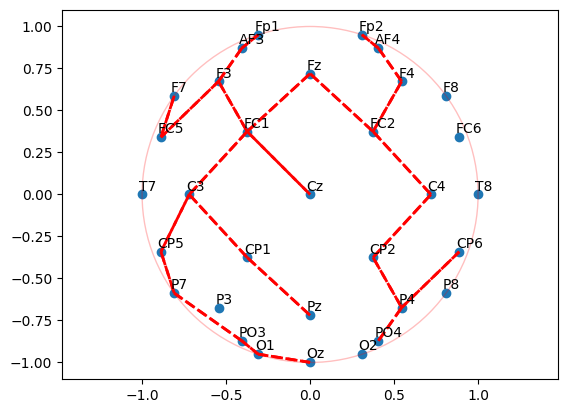

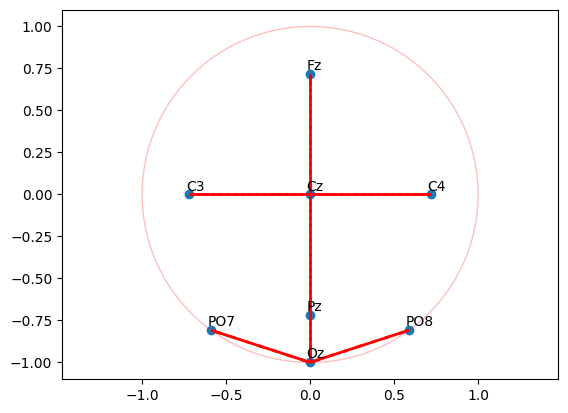

In [ ]:
# Crear instancias de WeightedGraph
graph_prim = WeightedGraph(directed=False)
new_graph_prim = WeightedGraph(directed=False)

graph_prim2 = WeightedGraph(directed=False)
new_graph_prim2 = WeightedGraph(directed=False)

# Llenar los grafos desde archivos
graph_prim.graficasGraph('Operaciones_Dhali.txt', '8elec.txt')
graph_prim2.graficasGraph('Lectura_S0A.txt', '32elec.txt')

# Aplicar el algoritmo de Prim a los grafos
prim('Fz', graph_prim, new_graph_prim)
prim('Fp1', graph_prim2, new_graph_prim2)

# Imprimir grafos originales y resultantes
print("Recorridos")
graph_prim.print_graph()

print("Recorrido Prim")
# (Supongo que la función `graficarGrafos` se encarga de imprimir el grafo)
graficarGrafos("32", new_graph_prim2)
graficarGrafos("8", new_graph_prim)

Etapa 4 - Cascos convexos de los vértices de los árboles de mínima expansión

Para los vértices de cada árbol de expansión mínima, encuentra los cascos convexos que envuelven dichos vértices utilizando cualquier técnica que tengas a tu disposición.

Funciones para calcular los cascos convexos y gráficarlos

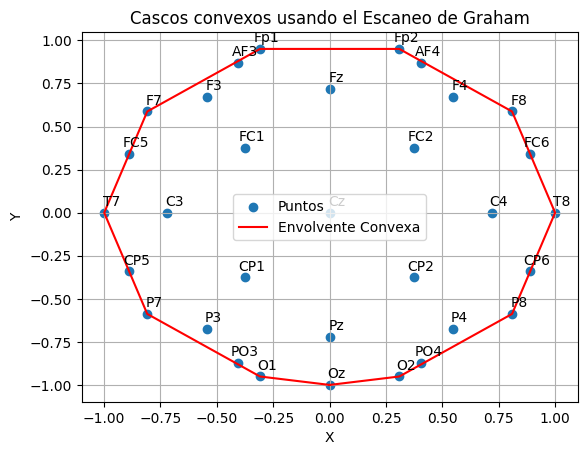

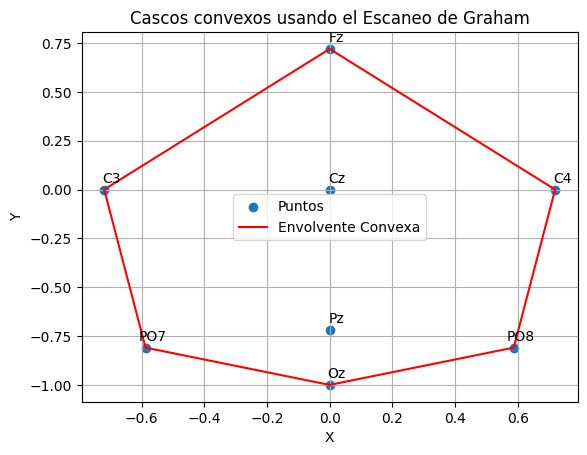

In [ ]:
def orientation(p, q, r):
    """
    Determina la orientación entre tres puntos.

    :param p: Primer punto como tupla (x, y).
    :param q: Segundo punto como tupla (x, y).
    :param r: Tercer punto como tupla (x, y).
    :return: 0 si los puntos son colineales, 1 si tienen orientación horaria, 2 si tienen orientación antihoraria.
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def graham_scan(points):
    """
    Implementación del algoritmo de Graham para encontrar la envolvente convexa de un conjunto de puntos.

    :param points: Lista de puntos representados como tuplas (x, y).
    :return: Lista de puntos que forman la envolvente convexa.
    """
    n = len(points)
    if n < 3:
        return []

    pivot = min(points, key=lambda point: (point[1], point[0]))

    points.sort(key=lambda point: (atan2(point[1] - pivot[1], point[0] - pivot[0]), point))

    hull = [points[0], points[1]]

    for i in range(2, n):
        while len(hull) > 1 and orientation(hull[-2], hull[-1], points[i]) != 2:
            hull.pop()
        hull.append(points[i])

    return hull

def plot_convex_hull(mapatxt, hull):
    """
    Grafica los puntos y la envolvente convexa.

    :param mapatxt: Ruta del archivo de coordenadas.
    :param hull: Lista de puntos que forman la envolvente convexa.
    """
    coordenadas = np.loadtxt(mapatxt, dtype=str)
    x = [float(coordenada[1]) for coordenada in coordenadas]
    y = [float(coordenada[2]) for coordenada in coordenadas]
    vertices = [coordenada[0] for coordenada in coordenadas]

    convex_x, convex_y = zip(*hull)

    plt.scatter(x, y, marker='o', label='Puntos')
    plt.plot(convex_x + (convex_x[0],), convex_y + (convex_y[0],), linestyle='-', color='red', label='Envolvente Convexa')

    for i, vertice in enumerate(vertices):
        plt.annotate(vertice, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cascos convexos usando el Escaneo de Graham')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    mapatxt = "32elec.txt"
    coordenadas = np.loadtxt(mapatxt, dtype=str)
    mapa2txt = "8elec.txt"
    coordenadas2 = np.loadtxt(mapa2txt, dtype=str)

    # Convierte las coordenadas a puntos (x, y)
    puntos = [(float(coordenada[1]), float(coordenada[2])) for coordenada in coordenadas]
    puntos2 = [(float(coordenada2[1]), float(coordenada2[2])) for coordenada2 in coordenadas2]

    # Aplica el algoritmo de Graham para encontrar la envolvente convexa
    convex_hull = graham_scan(puntos)
    convex_hull2 = graham_scan(puntos2)

    # Grafica los puntos y la envolvente convexa
    plot_convex_hull(mapatxt, convex_hull)
    plot_convex_hull(mapa2txt, convex_hull2)

Etapa 5 - Representación del grado de cada arista con diagramas de Voronoi


Función para realizar los calculos voronoi y graficar el diagrama

In [ ]:
def voronoi(coordenadastxt, gr=WeightedGraph):
    """
    Genera y grafica un diagrama de Voronoi a partir de las coordenadas de los puntos y colorea las regiones según la cantidad de aristas.

    :param coordenadastxt: Ruta del archivo de coordenadas.
    :param gr: Grafo ponderado para obtener información sobre las aristas (predeterminado: WeightedGraph).
    """
    coordenadas = np.loadtxt(coordenadastxt, dtype=float, usecols=(1, 2))
    nombres = np.loadtxt(coordenadastxt, dtype=str, usecols=(0))

    aristas = [len(gr.adjacent_vertices(nombre)) for nombre in nombres]

    vor = Voronoi(coordenadas)

    minima = min(aristas)
    maxima = max(aristas)

    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

    voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            plt.fill(*zip(*polygon), color=mapper.to_rgba(aristas[r]))

    plt.show()

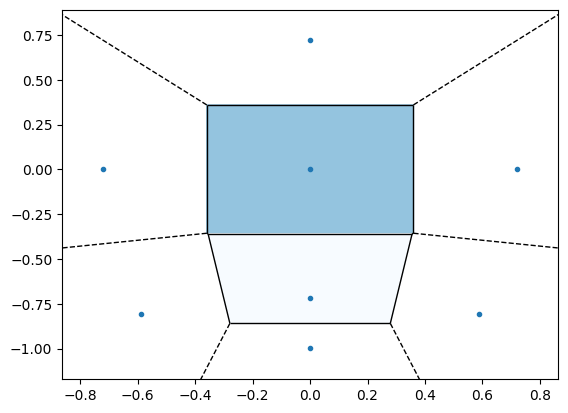

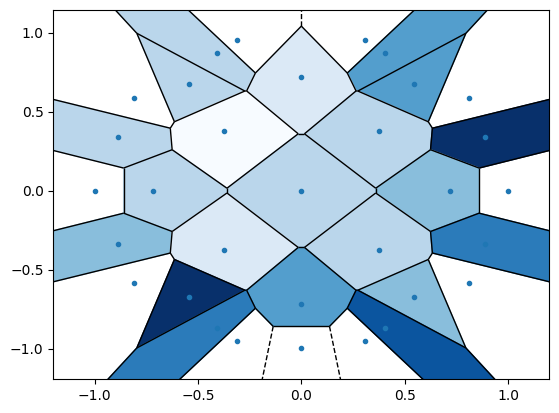

In [ ]:
#Llamada para el driagrama de Voronoi de 8 electrodos.
voronoi('8elec.txt', grafo1)
#Llamada para el driagrama de Voronoi de 32 electrodos.
voronoi('32elec.txt', grafo2)